In [1]:
pip install yfinance
!pip install plotly
!pip install AutoTS

SyntaxError: invalid syntax (517064696.py, line 1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta

In [3]:
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1

In [4]:
d2 = today - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [5]:
data = yf.download(
    'BTC-USD',
    start=start_date,
    end=end_date,
    progress=False
)

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731
2022-05-01,37713.265625,38627.859375,37585.789062,38469.093750,38469.093750,27002760110
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490


In [7]:
data['Date'] = data.index
data = data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop=True, inplace=True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731
1,2022-05-01,37713.265625,38627.859375,37585.789062,38469.093750,38469.093750,27002760110
2,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
3,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
4,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
...,...,...,...,...,...,...,...
725,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,30276655120
726,2024-04-25,64275.019531,65275.207031,62783.632812,64481.707031,64481.707031,32155786816
727,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950
728,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039


In [9]:
data.shape
print(data["Open"])

0      38605.859375
1      37713.265625
2      38472.187500
3      38528.109375
4      37748.011719
           ...     
725    66408.718750
726    64275.019531
727    64485.371094
728    63750.988281
729    63423.515625
Name: Open, Length: 730, dtype: float64


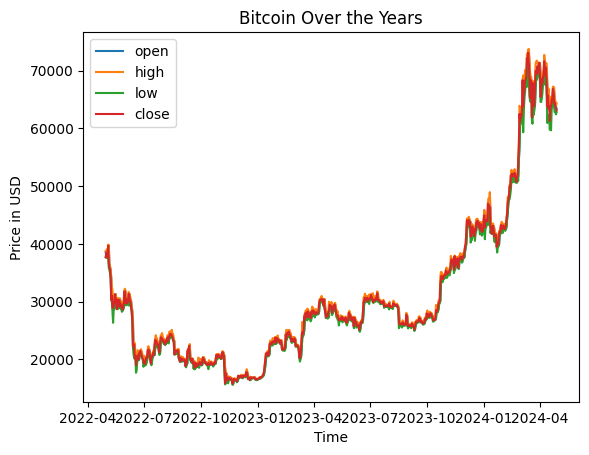

In [10]:
x = data["Date"]

plt.title("Bitcoin Over the Years")
plt.xlabel("Time")
plt.ylabel('Price in USD')

plt.plot(x, data["Open"], label="open")
plt.plot(x, data["High"], label="high")
plt.plot(x, data["Low"], label="low")
plt.plot(x, data["Close"], label="close")
plt.legend(['open', 'high', 'low', 'close'])
plt.show()

In [31]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))
data.info

Close        1.000000
Adj Close    1.000000
High         0.998897
Low          0.998732
Open         0.997286
Date         0.755996
Volume       0.227943
Name: Close, dtype: float64


<bound method DataFrame.info of           Date          Open          High           Low         Close  \
0   2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000   
1   2022-05-01  37713.265625  38627.859375  37585.789062  38469.093750   
2   2022-05-02  38472.187500  39074.972656  38156.562500  38529.328125   
3   2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   
4   2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
..         ...           ...           ...           ...           ...   
725 2024-04-24  66408.718750  67075.367188  63589.871094  64276.898438   
726 2024-04-25  64275.019531  65275.207031  62783.632812  64481.707031   
727 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320312   
728 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625   
729 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469   

        Adj Close       Volume  
0    37714.875000  23895713731  
1    38469.09

In [12]:
from autots import AutoTS
model = AutoTS(forecast_length=1, frequency='infer', ensemble='simple', max_generations=4, num_validations=2)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model AverageValueNaive in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model ETS in generation 0 of 4
Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLM in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model GLS in generation 0 of 4
Model Number: 15 with model LastValueNaive in generation 0 of 4
Model Number: 16 with model LastValueNaive in generation 0 of 4
Model Number: 17 with model LastValueNaive in generation 0 of 4
Model Number: 18 with model LastValueNaive in generation 0 of 4
Model Number: 19 with model SeasonalNaive in generation 0 of 4
Model Number: 20 with model SeasonalNaive in generation 0 of 4
Model Number: 21 with model SeasonalNaive in generation 0 of 4
Model Number: 22 with mod

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 31 with model FBProphet in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 4
Model Number: 33 with model MultivariateRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 4
Model Number: 36 with model DatepartRegression in generation 0 of 4
Model Number: 37 with model UnobservedComponents in generation 0 of 4
Model Number: 38 with model UnobservedComponents in generation 0 of 4
Model Number: 39 with model ETS in generation 0 of 4
Model Number

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 64 in generation 0: FBProphet
Model Number: 65 with model UnobservedComponents in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 65 in generation 0: UnobservedComponents
Model Number: 66 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 66 in generation 0: VAR
Model Number: 6

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 100 with model ETS in generation 0 of 4
Model Number: 101 with model DatepartRegression in generation 0 of 4
Model Number: 102 with model LastValueNaive in generation 0 of 4
Model Number: 103 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 103 in generation 0: WindowRegression
Model Number: 104 with model SeasonalityMotif in generation 0 of 4
Model Number: 105 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model ETS in generation 0 of 4
Model Number: 107 with model SeasonalityMotif in generation 0 of 4
Model Number: 108 with model UnivariateMotif in generation 0 of 4
Model Number: 109 with model LastValueNaive in generation 0 of 4
Model Number: 110 with model SeasonalNaive in generation 0 of 4
Model Number: 111 with model UnivariateMotif in generation 0 of 4
Model Number: 112 with mo

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 118 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 118 in generation 0: VAR
Model Number: 119 with model MetricMotif in generation 0 of 4
Model Number: 120 with model GLM in generation 0 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 120 in generation 0: GLM
Model Number: 121 with model SectionalMotif in generation 0 of 4
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 121 in generation 0: SectionalMotif
Model Number: 122 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 122 in generation 0: DatepartRegression
Model Number: 123 with model SeasonalityMotif in generation 0 of 4
Model Number: 124 with model MultivariateMotif in generation 0 of 4
Model Number: 125 with model Theta in generation 0 of 4
Model Numb

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 136 with model UnobservedComponents in generation 0 of 4
Model Number: 137 with model ARDL in generation 0 of 4
Model Number: 138 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 138 in generation 0: WindowRegression
Model Number: 139 with model MetricMotif in generation 0 of 4
Model Number: 140 with model ARDL in generation 0 of 4
Model Number: 141 with model SectionalMotif in generation 0 of 4
Model Number: 142 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 142 in generation 0: WindowRegression
Model Number: 143 with model ConstantNaive in generation 0 of 4
Model Number: 144 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 144 in generation 0: WindowRegression
Model Number: 145 with model UnobservedComponents in generation 0 of 4
Tem

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {}}") in model 167 in generation 0: GLM
Model Number: 168 with model NVAR in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {}, '1': {}, '2': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 168 in generation 0: NVAR
Model Number: 169 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 169 in generation 0: WindowRegression
Model Number: 170 with model ARIMA in generation 0 of 4
Model Number: 171 with model ETS in generation 0 of 4
Model Number: 172 with model UnivariateMotif in generation 0 of 4
Model Number: 173 with model ARCH in generation

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}}") in model 181 in generation 0: WindowRegression
New Generation: 1 of 4
Model Number: 182 with model UnivariateMotif in generation 1 of 4
Model Number: 183 with model MultivariateMotif in generation 1 of 4
Model Number: 184 with model ARIMA in generation 1 of 4
Model Number: 185 with model LastValueNaive in generation 1 of 4
Model Number: 186 with model UnobservedComponents in generation 1 of 4
Model Number: 187 with model ARIMA in generation 1 of 4
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 187 in generation 1: ARIMA
Model Number: 188 with model Theta in generation 1 of 4
Model Number: 189 with mode

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 217 with model SeasonalityMotif in generation 1 of 4
Model Number: 218 with model NVAR in generation 1 of 4
Model Number: 219 with model AverageValueNaive in generation 1 of 4
Model Number: 220 with model Theta in generation 1 of 4
Model Number: 221 with model GLM in generation 1 of 4
Model Number: 222 with model SeasonalNaive in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 223 with model ARDL in generation 1 of 4
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'window': 730}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 223 in generation 1: ARDL
Model Number: 224 with model ETS in generation 1 of 4
Model Number: 225 with model ConstantNaive in generation 1 of 4
Model Number: 226 with model ETS in generation 1 of 4
Model Number: 227 with model UnivariateMotif in generation 1 of 4
Model Number: 228 with model SectionalMotif in generation 1 of 4
Model Number: 229 with model GLS in generation 1 of 4
Model Number: 230 with model ConstantNaive in generation 1 of 4
Model Number: 231 with model WindowRegression in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 232 with model ETS in generation 1 of 4
Model Number: 233 with model MultivariateRegression in generation 1 of 4
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 233 in generation 1: MultivariateRegression
Model Number: 234 with model DatepartRegression in generation 1 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 234 in generation 1: DatepartRegression
Model Number: 235 with model LastValueNaive in generation 1 of 4
Model Number: 236 with model LastValueNaive in generation 1 of 4
Model Number: 237 with model UnobservedComponents in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 238 with model GLM in generation 1 of 4
Model Number: 239 with model MultivariateMotif in generation 1 of 4
Model Number: 240 with model ConstantNaive in generation 1 of 4
Model Number: 241 with model ETS in generation 1 of 4
Model Number: 242 with model GLM in generation 1 of 4
Model Number: 243 with model MetricMotif in generation 1 of 4
Model Number: 244 with model LastValueNaive in generation 1 of 4
Model Number: 245 with model GLM in generation 1 of 4
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 245 in generation 1: GLM
Model Number: 246 with model LastValueNaive in generation 1 of 4
Model Number: 247 with model SectionalMotif in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 248 with model SeasonalNaive in generation 1 of 4
Model Number: 249 with model UnivariateMotif in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 250 with model Theta in generation 1 of 4
Model Number: 251 with model UnivariateRegression in generation 1 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'method': 'mad', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'fillna': 'mean', 'center': 'median'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'decimals': -1, 'on_transform': False, 'on_inverse': True}, '5': {}}") in model 251 in generation 1: UnivariateRegression
Model Number: 252 with model Theta in generation 1 of 4
Model Number: 253 with model MultivariateRegression in generation 1 of 4
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 253 in generation 1: MultivariateRegression
Model Number: 2

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 261 with model DatepartRegression in generation 1 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 261 in generation 1: DatepartRegression
Model Number: 262 with model SectionalMotif in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 263 with model ARDL in generation 1 of 4
Model Number: 264 with model LastValueNaive in generation 1 of 4
Model Number: 265 with model ETS in generation 1 of 4
Model Number: 266 with model GLM in generation 1 of 4
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 266 in generation 1: GLM
Model Number: 267 with model MultivariateMotif in generation 1 of 4
Model Number: 268 with model ARIMA in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 269 with model Theta in generation 1 of 4
Model Number: 270 with model GLM in generation 1 of 4
Model Number: 271 with model UnivariateMotif in generation 1 of 4
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': 'common_fourier'}, 'fillna': 'akima'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'lag_1': 28, 'method': 'LastValue'}}") in model 271 in generation 1: UnivariateMotif
Model Number: 272 with model Theta in generation 1 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 273 with model SectionalMotif in generation 1 of 4
Model Number: 274 with model MultivariateRegression in generation 1 of 4
Model Number: 275 with model AverageValueNaive in generation 1 of 4
Model Number: 276 with model ARDL in generation 1 of 4
Model Number: 277 with model NVAR in generation 1 of 4
Model Number: 278 with model NVAR in generation 1 of 4
Model Number: 279 with model AverageValueNaive in generation 1 of 4
Model Number: 280 with model MultivariateMotif in generation 1 of 4
Model Number: 281 with model ETS in generation 1 of 4
Model Number: 282 with model SeasonalityMotif in generation 1 of 4
Model Number: 283 with model GLS in generation 1 of 4
Model Number: 284 with model WindowRegression in generation 1 of 4
Model Number: 285 with model LastValueNaive in generation 1 of 4
Model Number: 286 with model ConstantNaive in generation 1 of 4
Model Number: 287 with model NVAR in generation 1 of 4
Model Number: 288 with model NVAR in generation 1 of 4
Model Number

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\tools\seasonal.py:630: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)


Model Number: 300 with model MultivariateRegression in generation 1 of 4
Model Number: 301 with model LastValueNaive in generation 1 of 4
Model Number: 302 with model ARIMA in generation 1 of 4
Model Number: 303 with model AverageValueNaive in generation 1 of 4
Model Number: 304 with model NVAR in generation 1 of 4
Model Number: 305 with model ETS in generation 1 of 4
Model Number: 306 with model LastValueNaive in generation 1 of 4
New Generation: 2 of 4
Model Number: 307 with model MultivariateMotif in generation 2 of 4
Model Number: 308 with model UnivariateMotif in generation 2 of 4
Model Number: 309 with model SectionalMotif in generation 2 of 4
Model Number: 310 with model MultivariateMotif in generation 2 of 4
Model Number: 311 with model ARIMA in generation 2 of 4
Model Number: 312 with model MultivariateRegression in generation 2 of 4
Model Number: 313 with model UnobservedComponents in generation 2 of 4
Model Number: 314 with model NVAR in generation 2 of 4
Model Number: 315 w

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 339 with model MultivariateMotif in generation 2 of 4
Model Number: 340 with model Theta in generation 2 of 4
Model Number: 341 with model NVAR in generation 2 of 4
Model Number: 342 with model GLS in generation 2 of 4
Model Number: 343 with model ConstantNaive in generation 2 of 4
Model Number: 344 with model Theta in generation 2 of 4
Model Number: 345 with model SectionalMotif in generation 2 of 4
Model Number: 346 with model LastValueNaive in generation 2 of 4
Model Number: 347 with model Theta in generation 2 of 4
Model Number: 348 with model WindowRegression in generation 2 of 4
Model Number: 349 with model MultivariateRegression in generation 2 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.46324e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 350 with model AverageValueNaive in generation 2 of 4
Model Number: 351 with model NVAR in generation 2 of 4
Model Number: 352 with model UnobservedComponents in generation 2 of 4
Model Number: 353 with model SectionalMotif in generation 2 of 4
Model Number: 354 with model ARIMA in generation 2 of 4
Model Number: 355 with model AverageValueNaive in generation 2 of 4
Model Number: 356 with model AverageValueNaive in generation 2 of 4
Model Number: 357 with model MultivariateMotif in generation 2 of 4
Model Number: 358 with model MultivariateRegression in generation 2 of 4
Model Number: 359 with model MultivariateMotif in generation 2 of 4
Model Number: 360 with model ARDL in generation 2 of 4
Model Number: 361 with model MultivariateMotif in generation 2 of 4
Model Number: 362 with model MetricMotif in generation 2 of 4
Model Number: 363 with model WindowRegression in generation 2 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 363 in g

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\varfuncs

Model Number: 372 with model ARDL in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 372 in generation 2: ARDL
Model Number: 373 with model ETS in generation 2 of 4
Model Number: 374 with model LastValueNaive in generation 2 of 4
Model Number: 375 with model UnivariateRegression in generation 2 of 4
Model Number: 376 with model UnobservedComponents in generation 2 of 4
Model Number: 377 with model ARIMA in generation 2 of 4
Model Number: 378 with model DatepartRegression in generation 2 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'fixed': True, 'window': 90, 'macro_micro': True, 'center': True}, '2': {}}") in model 378 in generation 2: DatepartRegression
Model Number: 379 with model UnivariateMotif in generation 2 of 4
Model Number: 380 with model NVAR in generati

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 413 with model ARIMA in generation 2 of 4
Model Number: 414 with model DatepartRegression in generation 2 of 4
Model Number: 415 with model MultivariateRegression in generation 2 of 4
Model Number: 416 with model AverageValueNaive in generation 2 of 4
Model Number: 417 with model UnivariateMotif in generation 2 of 4
Model Number: 418 with model ARIMA in generation 2 of 4
Model Number: 419 with model WindowRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 419 in generation 2: WindowRegression
Model Number: 420 with model ConstantNaive in generation 2 of 4
Model Number: 421 with model UnobservedComponents in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 421 in generation 2: UnobservedComponents
Model Number: 422 with model AverageValueNaive in generation 2 of 4
Model Number: 423 with model Theta in generation 2 of 4
Model Nu

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 429 with model GLM in generation 2 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 429 in generation 2: GLM
Model Number: 430 with model SeasonalityMotif in generation 2 of 4
Model Number: 431 with model MultivariateMotif in generation 2 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


New Generation: 3 of 4
Model Number: 432 with model ConstantNaive in generation 3 of 4
Model Number: 433 with model WindowRegression in generation 3 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 434 with model ARDL in generation 3 of 4
Model Number: 435 with model ARDL in generation 3 of 4
Model Number: 436 with model ETS in generation 3 of 4
Model Number: 437 with model Theta in generation 3 of 4
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.05, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'grow_policy': 'lossguide', 'quantile_alpha': 0.5, 'tree_method': 'hist'}, 'datepart_method': 'common_fourier'}, 'fillna': 'linear'}, '1': {}, '2': {'fillna': 'linear', 'center': 'zero'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'window_size': 30, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'average'}}") in model 437 in generation 3: Theta
Model Number: 4

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 458 with model Theta in generation 3 of 4
Model Number: 459 with model MetricMotif in generation 3 of 4
Model Number: 460 with model MultivariateMotif in generation 3 of 4
Model Number: 461 with model MultivariateMotif in generation 3 of 4
Model Number: 462 with model DatepartRegression in generation 3 of 4
Model Number: 463 with model MultivariateRegression in generation 3 of 4
Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 463 in generation 3: MultivariateRegression
Model Number: 464 with model ConstantNaive in generation 3 of 4
Model Number: 465 with model SectionalMotif in generation 3 of 4
Model Number: 466 with model NVAR in generation 3 of 4
Model Number: 467 with model ETS in generation 3 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 468 with model ARDL in generation 3 of 4
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 468 in generation 3: ARDL
Model Number: 469 with model SeasonalityMotif in generation 3 of 4
Model Number: 470 with model AverageValueNaive in generation 3 of 4
Model Number: 471 with model DatepartRegression in generation 3 of 4
Model Number: 472 with model GLM in generation 3 of 4
Model Number: 473 with model NVAR in generation 3 of 4
Model Number: 474 with model ARIMA in generation 3 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 475 with model MetricMotif in generation 3 of 4
Model Number: 476 with model MultivariateRegression in generation 3 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'constant': 0, 'reintroduction_model': None, 'fillna': 'ffill'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'average'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 476 in generation 3: MultivariateRegression
Model Number: 477 with model SeasonalityMotif in generation 3 of 4
Model Number: 478 with model MultivariateRegression in generation 3 of 4
Model Number: 479 with model SectionalMotif in generation 3 of 4
Model Number: 480 with model ETS in gener

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 484 with model SeasonalNaive in generation 3 of 4
Model Number: 485 with model NVAR in generation 3 of 4
Model Number: 486 with model DatepartRegression in generation 3 of 4
Model Number: 487 with model MultivariateMotif in generation 3 of 4
Model Number: 488 with model Theta in generation 3 of 4
Model Number: 489 with model UnobservedComponents in generation 3 of 4
Model Number: 490 with model NVAR in generation 3 of 4
Model Number: 491 with model Theta in generation 3 of 4
Model Number: 492 with model SeasonalNaive in generation 3 of 4
Model Number: 493 with model NVAR in generation 3 of 4
Model Number: 494 with model Theta in generation 3 of 4
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05, 'rolling_periods': 200, 'center': True}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only'

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 498 with model SectionalMotif in generation 3 of 4
Model Number: 499 with model ARIMA in generation 3 of 4
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 499 in generation 3: ARIMA
Model Number: 500 with model MetricMotif in generation 3 of 4
Model Number: 501 with model Theta in generation 3 of 4
Model Number: 502 with model NVAR in generation 3 of 4
Model Number: 503 with model MultivariateMotif in generation 3 of 4
Model Number: 504 with model ConstantNaive in generation 3 of 4
Model Number: 505 with model MultivariateRegression in generation 3 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_linear_loss.py:290: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 505 in generation 3: MultivariateRegression
Model Number: 506 with model UnivariateMotif in generation 3 of 4
Model Number: 507 with model LastValueNaive in generation 3 of 4
Model Number: 508 with model GLM in generation 3 of 4
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params ffill_mean_biased {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 512 with model LastValueNaive in generation 3 of 4
Model Number: 513 with model UnivariateMotif in generation 3 of 4
Model Number: 514 with model SeasonalityMotif in generation 3 of 4
Model Number: 515 with model GLM in generation 3 of 4
Model Number: 516 with model ETS in generation 3 of 4
Model Number: 517 with model SeasonalNaive in generation 3 of 4
Model Number: 518 with model GLS in generation 3 of 4
Model Number: 519 with model MultivariateMotif in generation 3 of 4
Model Number: 520 with model AverageValueNaive in generation 3 of 4
Model Number: 521 with model MultivariateMotif in generation 3 of 4
Model Number: 522 with model ConstantNaive in generation 3 of 4
Model Number: 523 with model ARDL in generation 3 of 4
Model Number: 524 with model LastValueNaive in generation 3 of 4
Model Number: 525 with model UnivariateRegression in generation 3 of 4
Model Number: 526 with model ConstantNaive in generation 3 of 4
Model Number: 527 with model SeasonalityMotif in gene

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 543 with model UnivariateRegression in generation 3 of 4
Model Number: 544 with model ARIMA in generation 3 of 4
Model Number: 545 with model Theta in generation 3 of 4
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 0}, '2': {}, '3': {'cutoff': 0.01, 'reverse': False}}") in model 545 in generation 3: Theta
Model Number: 546 with model ARDL in generation 3 of 4
Model Number: 547 with model AverageValueNaive in generation 3 of 4
Model Number: 548 with model LastValueNaive in generation 3 of 4
Model Number: 549 with model NVAR in generation 3 of 4
Model Number: 550 with model GLM in generation 3 of 4
Model Number: 551 with model GLM in generation 3 of 4
Model Number: 552 with model LastValueNaive in generation 3 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 553 with model UnivariateMotif in generation 3 of 4
Model Number: 554 with model AverageValueNaive in generation 3 of 4
Model Number: 555 with model ARDL in generation 3 of 4
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 555 in generation 3: ARDL
Model Number: 556 with model UnivariateRegression in generation 3 of 4
New Generation: 4 of 4
Model Number: 557 with model GLM in generation 4 of 4
Model Number: 558 with model UnivariateMotif in generation 4 of 4
Model Number: 559 with model WindowRegression in generation 4 of 4
Model Number: 560 with model SeasonalityMotif in generation 4 of 4
Model Number: 561 with model MultivariateRegression in generation 4 of 4
Model Number: 562 with model ETS in generation 4 of 4
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill_mean_biased {'0': {}, '1': {'algorithm': 'deflation', 'fun': 'cube', 'max_

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 583 with model Theta in generation 4 of 4
Model Number: 584 with model ETS in generation 4 of 4
Model Number: 585 with model MetricMotif in generation 4 of 4
Model Number: 586 with model NVAR in generation 4 of 4
Model Number: 587 with model ETS in generation 4 of 4
Model Number: 588 with model UnivariateMotif in generation 4 of 4
Model Number: 589 with model MultivariateMotif in generation 4 of 4
Model Number: 590 with model SeasonalNaive in generation 4 of 4
Model Number: 591 with model UnivariateRegression in generation 4 of 4
Model Number: 592 with model SeasonalityMotif in generation 4 of 4
Model Number: 593 with model MultivariateRegression in generation 4 of 4
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'n_harmonics': 10, 'detrend': 'linear'}, '1': {'fixed': True, 'window': 60, 'macro_micro': False, 'center': False}, '2': {'whiten': False}, '3': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}}

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 620 with model SeasonalityMotif in generation 4 of 4
Model Number: 621 with model LastValueNaive in generation 4 of 4
Model Number: 622 with model MultivariateMotif in generation 4 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 623 with model SectionalMotif in generation 4 of 4
Model Number: 624 with model DatepartRegression in generation 4 of 4
Model Number: 625 with model AverageValueNaive in generation 4 of 4
Model Number: 626 with model LastValueNaive in generation 4 of 4
Model Number: 627 with model UnivariateMotif in generation 4 of 4
Model Number: 628 with model NVAR in generation 4 of 4
Model Number: 629 with model MetricMotif in generation 4 of 4
Template Eval Error: ValueError('kth(=99) out of bounds (43)') in model 629 in generation 4: MetricMotif
Model Number: 630 with model WindowRegression in generation 4 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 630 in generation 4: WindowRegression
Model Number: 631 with model DatepartRegression in generation 4 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 631 in generation 4: DatepartRegression
Model Number: 632 with mo

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 678 with model ARIMA in generation 4 of 4
Model Number: 679 with model GLM in generation 4 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 679 in generation 4: GLM
Model Number: 680 with model NVAR in generation 4 of 4
Model Number: 681 with model GLM in generation 4 of 4


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 682 with model Ensemble in generation 5 of Ensembles
Model Number: 683 with model Ensemble in generation 5 of Ensembles
Model Number: 684 with model Ensemble in generation 5 of Ensembles
Model Number: 685 with model Ensemble in generation 5 of Ensembles
Model Number: 686 with model Ensemble in generation 5 of Ensembles
Model Number: 687 with model Ensemble in generation 5 of Ensembles
Model Number: 688 with model Ensemble in generation 5 of Ensembles
Model Number: 689 with model Ensemble in generation 5 of Ensembles
Validation Round: 1
Model Number: 1 of 104 with model UnivariateMotif for Validation 1
📈 1 - UnivariateMotif with avg smape 0.58: 
Model Number: 2 of 104 with model Ensemble for Validation 1
2 - Ensemble with avg smape 0.6: 
Model Number: 3 of 104 with model Ensemble for Validation 1
3 - Ensemble with avg smape 0.6: 
Model Number: 4 of 104 with model Ensemble for Validation 1
4 - Ensemble with avg smape 0.6: 
Model Number: 5 of 104 with model Ensemble for Vali

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


40 - ETS with avg smape 0.6: 
Model Number: 41 of 104 with model LastValueNaive for Validation 1
41 - LastValueNaive with avg smape 0.62: 
Model Number: 42 of 104 with model MetricMotif for Validation 1
42 - MetricMotif with avg smape 0.6: 
Model Number: 43 of 104 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 0.6: 
Model Number: 44 of 104 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 0.6: 
Model Number: 45 of 104 with model MetricMotif for Validation 1
45 - MetricMotif with avg smape 0.6: 
Model Number: 46 of 104 with model SeasonalityMotif for Validation 1
46 - SeasonalityMotif with avg smape 0.62: 
Model Number: 47 of 104 with model AverageValueNaive for Validation 1
47 - AverageValueNaive with avg smape 0.62: 
Model Number: 48 of 104 with model SeasonalityMotif for Validation 1
48 - SeasonalityMotif with avg smape 0.62: 
Model Number: 49 of 104 with model AverageValueNaive for Validation 1
49 - AverageValueNaive with avg smape 0.62

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


72 - GLM with avg smape 0.6: 
Model Number: 73 of 104 with model UnivariateRegression for Validation 1
73 - UnivariateRegression with avg smape 0.6: 
Model Number: 74 of 104 with model MultivariateRegression for Validation 1
74 - MultivariateRegression with avg smape 0.6: 
Model Number: 75 of 104 with model MultivariateRegression for Validation 1
75 - MultivariateRegression with avg smape 0.6: 
Model Number: 76 of 104 with model UnivariateRegression for Validation 1
76 - UnivariateRegression with avg smape 0.6: 
Model Number: 77 of 104 with model ConstantNaive for Validation 1
77 - ConstantNaive with avg smape 0.51: 
Model Number: 78 of 104 with model WindowRegression for Validation 1
78 - WindowRegression with avg smape 0.56: 
Model Number: 79 of 104 with model SectionalMotif for Validation 1
79 - SectionalMotif with avg smape 0.53: 
Model Number: 80 of 104 with model MultivariateRegression for Validation 1
80 - MultivariateRegression with avg smape 2.9: 
Model Number: 81 of 104 with 

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


89 - WindowRegression with avg smape 0.17: 
Model Number: 90 of 104 with model WindowRegression for Validation 1
90 - WindowRegression with avg smape 0.99: 
Model Number: 91 of 104 with model ETS for Validation 1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


91 - ETS with avg smape 0.21: 
Model Number: 92 of 104 with model ARIMA for Validation 1
92 - ARIMA with avg smape 0.02: 
Model Number: 93 of 104 with model ARIMA for Validation 1
93 - ARIMA with avg smape 0.92: 
Model Number: 94 of 104 with model NVAR for Validation 1
94 - NVAR with avg smape 0.34: 
Model Number: 95 of 104 with model ARIMA for Validation 1
95 - ARIMA with avg smape 0.58: 
Model Number: 96 of 104 with model UnivariateRegression for Validation 1
96 - UnivariateRegression with avg smape 0.29: 
Model Number: 97 of 104 with model MultivariateRegression for Validation 1
97 - MultivariateRegression with avg smape 1.13: 
Model Number: 98 of 104 with model UnobservedComponents for Validation 1
98 - UnobservedComponents with avg smape 0.32: 
Model Number: 99 of 104 with model ARIMA for Validation 1
99 - ARIMA with avg smape 0.89: 
Model Number: 100 of 104 with model ARIMA for Validation 1
100 - ARIMA with avg smape 1.18: 
Model Number: 101 of 104 with model MultivariateMotif fo

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


42 - MetricMotif with avg smape 1.45: 
Model Number: 43 of 104 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 1.45: 
Model Number: 44 of 104 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 1.45: 
Model Number: 45 of 104 with model MetricMotif for Validation 2
45 - MetricMotif with avg smape 1.45: 
Model Number: 46 of 104 with model SeasonalityMotif for Validation 2
46 - SeasonalityMotif with avg smape 1.45: 
Model Number: 47 of 104 with model AverageValueNaive for Validation 2
47 - AverageValueNaive with avg smape 1.45: 
Model Number: 48 of 104 with model SeasonalityMotif for Validation 2
48 - SeasonalityMotif with avg smape 1.45: 
Model Number: 49 of 104 with model AverageValueNaive for Validation 2
49 - AverageValueNaive with avg smape 1.45: 
Model Number: 50 of 104 with model SeasonalityMotif for Validation 2
50 - SeasonalityMotif with avg smape 1.45: 
Model Number: 51 of 104 with model UnivariateMotif for Validation 2
📈 51 - Univaria

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


73 - UnivariateRegression with avg smape 1.45: 
Model Number: 74 of 104 with model MultivariateRegression for Validation 2
74 - MultivariateRegression with avg smape 1.45: 
Model Number: 75 of 104 with model MultivariateRegression for Validation 2
75 - MultivariateRegression with avg smape 1.45: 
Model Number: 76 of 104 with model UnivariateRegression for Validation 2
76 - UnivariateRegression with avg smape 1.45: 
Model Number: 77 of 104 with model ConstantNaive for Validation 2
77 - ConstantNaive with avg smape 1.35: 
Model Number: 78 of 104 with model WindowRegression for Validation 2
78 - WindowRegression with avg smape 1.48: 
Model Number: 79 of 104 with model SectionalMotif for Validation 2
79 - SectionalMotif with avg smape 1.37: 
Model Number: 80 of 104 with model MultivariateRegression for Validation 2
80 - MultivariateRegression with avg smape 2.1: 
Model Number: 81 of 104 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 1.37: 
Model Number: 82 of

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


89 - WindowRegression with avg smape 1.28: 
Model Number: 90 of 104 with model WindowRegression for Validation 2
90 - WindowRegression with avg smape 1.41: 
Model Number: 91 of 104 with model ETS for Validation 2


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 91 - ETS with avg smape 0.42: 
Model Number: 92 of 104 with model ARIMA for Validation 2
92 - ARIMA with avg smape 1.14: 
Model Number: 93 of 104 with model ARIMA for Validation 2
📈 93 - ARIMA with avg smape 0.27: 
Model Number: 94 of 104 with model NVAR for Validation 2
94 - NVAR with avg smape 0.93: 
Model Number: 95 of 104 with model ARIMA for Validation 2
95 - ARIMA with avg smape 1.38: 
Model Number: 96 of 104 with model UnivariateRegression for Validation 2
96 - UnivariateRegression with avg smape 0.36: 
Model Number: 97 of 104 with model MultivariateRegression for Validation 2
97 - MultivariateRegression with avg smape 2.14: 
Model Number: 98 of 104 with model UnobservedComponents for Validation 2
98 - UnobservedComponents with avg smape 0.31: 
Model Number: 99 of 104 with model ARIMA for Validation 2
99 - ARIMA with avg smape 1.23: 
Model Number: 100 of 104 with model ARIMA for Validation 2
100 - ARIMA with avg smape 0.76: 
Model Number: 101 of 104 with model MultivariateMoti

In [45]:
from datetime import datetime
user_date = input()
user_date = datetime.strptime(user_date, '%Y-%m-%d')
final_date = user_date - timedelta(days=730)
print(final_date)

 2024-4-29


2022-04-30 00:00:00


In [48]:
prediction = model.predict(2022-4-30)
forecast = prediction.forecast
print(forecast)

Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\evaluator\auto_model.py", line 1339, in model_forecast
    df_forecast = model_forecast(
                  ^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\evaluator\auto_model.py", line 1446, in model_forecast
    model = model.fit(df_train_low, future_regressor_train)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\evaluator\auto_model.py", line 855, in fit
    self.model = self.model.fit(
                 ^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\models\sklearn.py", line 2693, in fit
    forecast_by_column(self, args, self.parallel, self.n_jobs, col)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\autots\models\sklearn.py

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


In [20]:
print(type(forecast))

<class 'pandas.core.frame.DataFrame'>
